<a href="https://colab.research.google.com/github/YasodaLAE/Image_Processing_Exercise/blob/main/210156U_a03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index No. : 210156U

Name : Y.L.A. Epa

GitHub : https://github.com/YasodaLAE/Image_Processing_Exercise

Given Code

100%|██████████| 170M/170M [00:02<00:00, 80.5MB/s]


Extracting ./ data/cifar-10-python.tar.gz to ./ data
Files already downloaded and verified
Epoch 1/20 ,Loss:0.976962572991848 
Epoch 2/20 ,Loss:0.949822379887104 
Epoch 3/20 ,Loss:0.9360983469486237 
Epoch 4/20 ,Loss:0.9275475687980652 
Epoch 5/20 ,Loss:0.921610014796257 
Epoch 6/20 ,Loss:0.9172055771946908 
Epoch 7/20 ,Loss:0.913790711402893 
Epoch 8/20 ,Loss:0.9110636572837829 
Epoch 9/20 ,Loss:0.9088346379399299 
Epoch 10/20 ,Loss:0.9069815643429756 
Epoch 11/20 ,Loss:0.9054210538268089 
Epoch 12/20 ,Loss:0.9040934260487556 
Epoch 13/20 ,Loss:0.9029548543691636 
Epoch 14/20 ,Loss:0.9019715856909752 
Epoch 15/20 ,Loss:0.9011176359653473 
Epoch 16/20 ,Loss:0.9003725306391716 
Epoch 17/20 ,Loss:0.8997200527191163 
Epoch 18/20 ,Loss:0.8991466102004051 
Epoch 19/20 ,Loss:0.8986411744356155 
Epoch 20/20 ,Loss:0.8981945905089378 


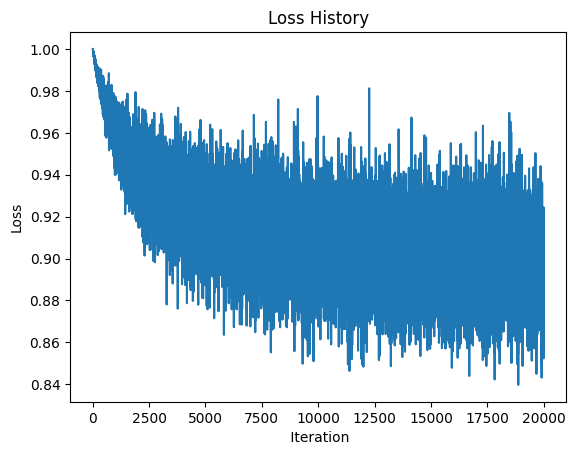

Training accuracy : 32.19%
Test accuracy : 32.47%


In [1]:
# Question 1
import torch
import torch .nn as nn
import torch .optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([ transforms .ToTensor() ,transforms .Normalize((0.5 , 0.5, 0.5) , (0.5 , 0.5, 0.5))])

batch_size = 50

trainset = torchvision.datasets.CIFAR10(root= './ data',train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root= './ data' , train=False ,download=True, transform=transform)
testloader = torch.utils.data.DataLoader( testset , batch_size=batch_size ,shuffle=False , num_workers=2)
classes = ( "plane" , "car" , 'bird' , 'cat' ,'deer', 'dog', 'frog' , 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32 # Input size (flattened CIFAR=10 image size)
K = 10 # Output size (number of classes in CIFAR=10)
std = 1e-5

# Initialize weights and biases
w = torch.randn(Din, K) * std # One layer: directly map input to output
b = torch.zeros(K)

# Hyperparameters
iterations = 20
lr = 2e-6 # Learning rate
lr_decay = 0.9 # Learning rate decay
reg = 0 # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i , data in enumerate(trainloader,0):
        # Get inputs and labels
        inputs , labels = data
        Ntr = inputs.shape[0] # Batch size
        x_train = inputs.view(Ntr, -1) # Flatten input to (Ntr, Din)
        y_train_onehot = nn. functional.one_hot(labels , K).float() # Convert labels to one=hot encoding

        # Forward pass
        y_pred = x_train.mm(w) + b # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1/Ntr)*torch.sum((y_pred-y_train_onehot) ** 2) + reg * torch.sum(w **2)
        loss_history.append(loss.item ())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr)*(y_pred-y_train_onehot)
        dw = x_train.t().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w -= lr * dw
        b -= lr * db

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1}/{ iterations } ,Loss:{ running_loss /len ( trainloader )} " )
    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot ( loss_history )
plt.title ("Loss History" )
plt.xlabel ( " Iteration" )
plt.ylabel ( "Loss" )
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0

with torch.no_grad():
    for data in trainloader :
        inputs , labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr,-1)
        y_train_onehot = nn.functional.one_hot(labels , K).float()

        # Forward pass
        y_train_pred = x_train.mm(w) + b
        predicted_train = torch.argmax(y_train_pred , dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print( f"Training accuracy : { train_acc :.2f}%" )

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad ():
    for data in testloader :
        inputs , labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn.functional.one_hot(labels , K).float()

        # Forward pass
        y_test_pred = x_test.mm(w) + b
        predicted_test = torch.argmax(y_test_pred , dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels ).sum().item()
test_acc = 100 * correct_test / total_test
print( f"Test accuracy : { test_acc :.2f}%" )

Modified Code

100%|██████████| 170M/170M [00:01<00:00, 90.4MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/10, Loss: 1.9716880059242248
Epoch 2/10, Loss: 1.7320300048589707
Epoch 3/10, Loss: 1.651045436501503
Epoch 4/10, Loss: 1.5919826810359954
Epoch 5/10, Loss: 1.5431971530914306
Epoch 6/10, Loss: 1.4995690224170686
Epoch 7/10, Loss: 1.4615893681049348
Epoch 8/10, Loss: 1.429521164536476
Epoch 9/10, Loss: 1.399111647605896
Epoch 10/10, Loss: 1.3722847167253494


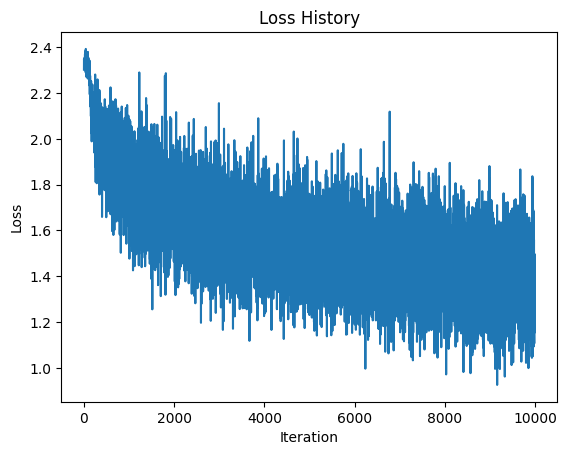

Training accuracy: 53.29%
Test accuracy: 47.80%


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 50

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ("plane", "car", 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
Dh = 100  # Number of nodes in the hidden layer
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w1 = torch.randn(Din, Dh) * std  # Weights for the first layer
b1 = torch.zeros(Dh)  # Biases for the first layer
w2 = torch.randn(Dh, K) * std  # Weights for the second layer
b2 = torch.zeros(K)  # Biases for the second layer

# Hyperparameters
iterations = 10
lr = 0.003  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass
        z1 = x_train.mm(w1) + b1  # First layer activation
        h1 = torch.sigmoid(z1)  # Sigmoid activation
        y_pred = h1.mm(w2) + b2  # Output layer activation

        # Loss calculation (Cross-Entropy Loss)
        loss = nn.functional.cross_entropy(y_pred, labels) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = nn.functional.softmax(y_pred, dim=1)
        dy_pred[range(Ntr), labels] -= 1
        dw2 = h1.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)
        dh1 = dy_pred.mm(w2.t()) * h1 * (1 - h1)
        dw1 = x_train.t().mm(dh1) + reg * w1
        db1 = dh1.sum(dim=0)

        # Parameter update
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")
    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0

with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)

        # Forward pass
        z1 = x_train.mm(w1) + b1
        h1 = torch.sigmoid(z1)
        y_train_pred = h1.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0

with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)

        # Forward pass
        z1 = x_test.mm(w1) + b1
        h1 = torch.sigmoid(z1)
        y_test_pred = h1.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


In [3]:
# Question 2

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# 1. Load the MNIST Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# 2. Initialize Layers for LeNet-5
conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
conv2 = nn.Conv2d(6, 16, kernel_size=5)
pool = nn.MaxPool2d(kernel_size=2, stride=2)
fc1 = nn.Linear(16*5*5,120)
fc2 = nn.Linear(120, 84)
fc3 = nn.Linear(84, 10)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam([*conv1.parameters(), *conv2.parameters(), *fc1.parameters(), *fc2.parameters(), *fc3.parameters()], lr=0.001)

# 3. Training Loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs, labels

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        x = torch.relu(conv1(inputs))
        x = pool(x)
        x = torch.relu(conv2(x))
        x = pool(x)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(fc1(x))
        x = torch.relu(fc2(x))
        outputs = fc3(x)

        # Compute loss and backpropagate
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(trainloader):.4f}")


# 4. Calculate Training Accuracy
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images, labels

        # Forward pass
        x = torch.relu(conv1(images))
        x = pool(x)
        x = torch.relu(conv2(x))
        x = pool(x)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(fc1(x))
        x = torch.relu(fc2(x))
        outputs = fc3(x)
        real, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training Accuracy: {train_acc:.2f}%")

# 5. Calculate Test Accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images, labels

        # Forward pass
        x = torch.relu(conv1(images))
        x = pool(x)
        x = torch.relu(conv2(x))
        x = pool(x)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(fc1(x))
        x = torch.relu(fc2(x))
        outputs = fc3(x)

        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
test_acc = 100 * correct_test / total_test
print(f"Test Accuracy: {test_acc:.2f}%")


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 34.7MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.06MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 8.18MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.69MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/10, Loss: 0.2464
Epoch 2/10, Loss: 0.0691
Epoch 3/10, Loss: 0.0481
Epoch 4/10, Loss: 0.0380
Epoch 5/10, Loss: 0.0316
Epoch 6/10, Loss: 0.0261
Epoch 7/10, Loss: 0.0227
Epoch 8/10, Loss: 0.0192
Epoch 9/10, Loss: 0.0170
Epoch 10/10, Loss: 0.0140
Training Accuracy: 99.59%
Test Accuracy: 98.88%


In [4]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
!unzip hymenoptera_data.zip

--2024-11-13 05:33:50--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 18.160.143.48, 18.160.143.21, 18.160.143.101, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.160.143.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M   194MB/s    in 0.2s    

2024-11-13 05:33:51 (194 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_dat

In [5]:
#Question 3

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

# 1. Load and Preprocess the Hymenoptera Dataset
dataset_path = './hymenoptera_data'
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}

train_data = datasets.ImageFolder(root=dataset_path + '/train', transform=data_transforms['train'])
val_data = datasets.ImageFolder(root=dataset_path + '/val', transform=data_transforms['validation'])
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
val_loader = DataLoader(val_data, batch_size=8, shuffle=False)
data_sizes = {'train': len(train_data), 'validation': len(val_data)}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Fine-Tuning the Pre-trained ResNet18 Model
print("Fine-Tuning ResNet-18 on Hymenoptera Dataset:")
model_ft = models.resnet18(pretrained=True)
model_ft.fc = nn.Linear(model_ft.fc.in_features, 2)  # Adapting to binary classification
model_ft = model_ft.to(device)

loss_function = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

num_epochs = 10
for epoch in range(num_epochs):
    model_ft.train()
    train_loss, train_corrects = 0.0, 0
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)
        optimizer_ft.zero_grad()
        outputs = model_ft(images)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer_ft.step()
        train_loss += loss.item() * images.size(0)
        _, predictions = torch.max(outputs, 1)
        train_corrects += torch.sum(predictions == targets.data)
    epoch_loss = train_loss / data_sizes['train']
    epoch_acc = 100 * train_corrects.double() / data_sizes['train']
    print(f"Epoch {epoch+1}/{num_epochs}: Loss = {epoch_loss:.4f}, Accuracy = {epoch_acc:.2f}%")

model_ft.eval()
val_corrects = 0
with torch.no_grad():
    for images, targets in val_loader:
        images, targets = images.to(device), targets.to(device)
        outputs = model_ft(images)
        _, predictions = torch.max(outputs, 1)
        val_corrects += torch.sum(predictions == targets.data)
val_acc = 100 * val_corrects.double() / data_sizes['validation']
print(f"Validation Accuracy after Fine-Tuning: {val_acc:.2f}%\n")

# 3. Feature Extraction with ResNet18
print("Using ResNet-18 as a Feature Extractor:")
model_fe = models.resnet18(pretrained=True)
for param in model_fe.parameters():
    param.requires_grad = False  # Freeze all layers
model_fe.fc = nn.Linear(model_fe.fc.in_features, 2)  # Custom classifier
model_fe = model_fe.to(device)

optimizer_fe = optim.SGD(model_fe.fc.parameters(), lr=0.001, momentum=0.9)

for epoch in range(num_epochs):
    model_fe.train()
    extract_loss, extract_corrects = 0.0, 0
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)
        optimizer_fe.zero_grad()
        outputs = model_fe(images)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer_fe.step()
        extract_loss += loss.item() * images.size(0)
        _, predictions = torch.max(outputs, 1)
        extract_corrects += torch.sum(predictions == targets.data)
    epoch_loss = extract_loss / data_sizes['train']
    epoch_acc = 100 * extract_corrects.double() / data_sizes['train']
    print(f"Epoch {epoch+1}/{num_epochs}: Loss = {epoch_loss:.4f}, Accuracy = {epoch_acc:.2f}%")

model_fe.eval()
val_corrects = 0
with torch.no_grad():
    for images, targets in val_loader:
        images, targets = images.to(device), targets.to(device)
        outputs = model_fe(images)
        _, predictions = torch.max(outputs, 1)
        val_corrects += torch.sum(predictions == targets.data)
val_acc = 100 * val_corrects.double() / data_sizes['validation']
print(f"Validation Accuracy using Feature Extraction: {val_acc:.2f}%")


Fine-Tuning ResNet-18 on Hymenoptera Dataset:


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 167MB/s]


Epoch 1/10: Loss = 0.5836, Accuracy = 68.85%
Epoch 2/10: Loss = 0.3304, Accuracy = 86.89%
Epoch 3/10: Loss = 0.3001, Accuracy = 83.61%
Epoch 4/10: Loss = 0.2243, Accuracy = 88.52%
Epoch 5/10: Loss = 0.1814, Accuracy = 93.03%
Epoch 6/10: Loss = 0.2688, Accuracy = 88.11%
Epoch 7/10: Loss = 0.1384, Accuracy = 94.26%
Epoch 8/10: Loss = 0.1687, Accuracy = 94.26%
Epoch 9/10: Loss = 0.1985, Accuracy = 91.80%
Epoch 10/10: Loss = 0.1485, Accuracy = 92.62%
Validation Accuracy after Fine-Tuning: 95.42%

Using ResNet-18 as a Feature Extractor:
Epoch 1/10: Loss = 0.6001, Accuracy = 66.80%
Epoch 2/10: Loss = 0.4093, Accuracy = 82.79%
Epoch 3/10: Loss = 0.3803, Accuracy = 80.33%
Epoch 4/10: Loss = 0.3990, Accuracy = 83.61%
Epoch 5/10: Loss = 0.3238, Accuracy = 84.02%
Epoch 6/10: Loss = 0.2904, Accuracy = 87.30%
Epoch 7/10: Loss = 0.2980, Accuracy = 86.07%
Epoch 8/10: Loss = 0.3462, Accuracy = 84.84%
Epoch 9/10: Loss = 0.2883, Accuracy = 86.48%
Epoch 10/10: Loss = 0.3804, Accuracy = 82.79%
Validation 